# <span style='color:blue'>   TP 1 : Régression Linéaire</span>

## <span style='color:red'>  0 - Import des modules </span>

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import IPython
import plotly.express as px

##   <span style='color:red'> 1 - Import de la base de donnée et affichage </span>

In [164]:
url = 'invest.txt'
df = pd.read_csv(url, sep=' ')
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


##  <span style='color:red'> 2 - Graphe GNP / Invest + Passage des variables en échelle logarithmique </span>

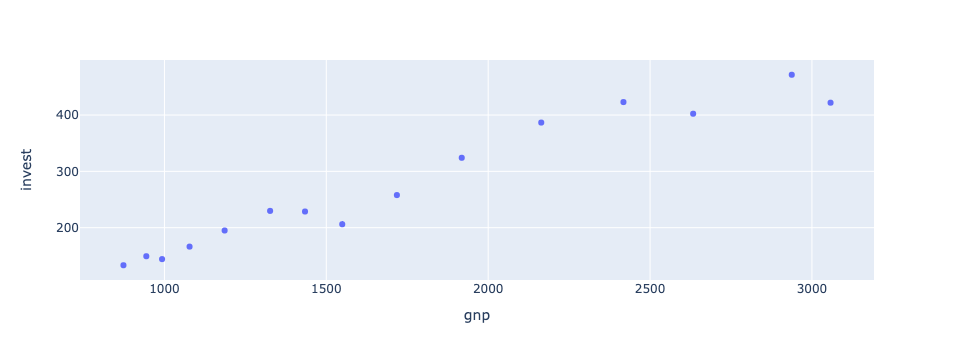

In [165]:
px.scatter(df, x='gnp', y='invest')

In [166]:
# Création des variables logarithmiques

df['gnp_log'] = df['gnp'].apply(np.log)
df['invest_log'] =df['invest'].apply(np.log)
df.head(10)

,year,gnp,invest,cpi,interest,gnp_log,invest_log
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000
5,1973,1326.4,229.8,105.75,6.44,7.190224,5.437209
6,1974,1434.2,228.7,115.08,7.83,7.268362,5.432411
7,1975,1549.2,206.1,125.79,6.25,7.345494,5.328361
8,1976,1718.0,257.9,132.34,5.50,7.448916,5.552572
9,1977,1918.3,324.1,140.05,5.46,7.559195,5.781052


##  <span style='color:red'> 3 - Régression de GNP sur INVEST et calcul des paramètres </span>

In [167]:
X = df['gnp_log']
Y = df['invest_log']
x_mean = X.mean()
y_mean = Y.mean()

In [168]:
# Calcul des paramètres en utlisant la formule mathématique

θ1_calc = ((X - x_mean)*(Y - y_mean)).sum() / ((X - x_mean)*(X - x_mean)).sum()
θ0_calc = y_mean - x_mean * θ1_calc

print("Selon le modèle calculatoire: \n\n- La pente = {}\n- La constante = {}".format(θ1_calc, θ0_calc))

Selon le modèle calculatoire: 

- La pente = 1.0152814015988707
- La constante = -1.9635913352301815


In [169]:
Y_pred = θ0_calc + θ1_calc * X
Y_pred

0     4.912294
1     4.991214
2     5.042285
3     5.125603
4     5.222832
5     5.336509
6     5.415842
7     5.494152
8     5.599155
9     5.711118
10    5.833432
11    5.946073
12    6.032681
13    6.143819
14    6.184400
Name: gnp_log, dtype: float64

In [170]:
# Calcul des variances des variables

sig_X = np.round(np.sqrt(np.var(X)),4)
sig_Y = np.round(np.sqrt(np.var(Y)),4)
sig_Y_pred = np.round(np.sqrt(np.var(Y_pred)),4)
print("La variance de GNP est {}\nLa variance de Invest est {}\nLa variance de Invest prédit: {}".format(sig_X,sig_Y, sig_Y_pred))


La variance de GNP est 0.4085
La variance de Invest est 0.4227
La variance de Invest prédit: 0.4147


In [171]:
# Calcul des variances de la pente et de l'intercept

n = len(X)

var_chap = ((Y-Y_pred)**2).sum()*1/(n-2)
var_chap

a = ((X-x_mean)**2).sum()

var_θ0 = var_chap * ((1/n) + ((x_mean**2)/(a)))
var_θ1 = var_chap / a

print("L'estimateur de la variance : {}\nLa variance de l'Intercept  : {}\nLa variance de la pente     : {}".format(var_chap, var_θ0, var_θ1))


L'estimateur de la variance : 0.007676338555460403
La variance de l'Intercept  : 0.16772896772604054
La variance de la pente     : 0.0030672833742692697


In [172]:
# Calcul des écarts types de la pente et de l'intercept

σ_θ0 = np.sqrt(var_θ0)
σ_θ1 = np.sqrt(var_θ1)
print("L'écart type de la pente    : {}\nL'écart type de l'intercept : {}".format(σ_θ0, σ_θ1))

L'écart type de la pente    : 0.40954727166230825
L'écart type de l'intercept : 0.05538306035485282


- Calcul du coefficient de détermination R2: $$R^2 = \frac{\sum_{i=1}^n{(\hat{Y}_i - \bar{Y})^2}}{\sum_{i=1}^n{(Y_i - \bar{Y})^2}}$$

In [173]:
R2 = ((Y_pred - y_mean)**2).sum() / ((Y - y_mean)**2).sum()
print("Selon le modèle calculatoire, le coefficient de détermination R2 = {}".format(np.round(R2,5)))


Selon le modèle calculatoire, le coefficient de détermination R2 = 0.96276


## <span style='color:red'> 4 - Test de Student sur la pente </span>

-    Test d'hypothèse H0 : la pente n'est pas significative : θ1 = 0


-    t-Statistique (Exercice 12) : $$T_1 = \frac{\hat{\theta}_1 - {\theta}_1}{\sqrt{\mathbb{V}[{\hat{\theta}_1}}]} = \frac{\hat{\theta}_1}{\sqrt{\mathbb{V}[{\hat{\theta}_1}}]}$$

In [174]:
t_stat =   θ1_calc / np.sqrt(var_θ1)
t_stat


18.33198445686667

In [175]:
# Calcul de la p-Value

student = stats.t.cdf(t_stat, n-2)
p_value = 2 * (1 - student)
t_stat, student, p_value

(18.33198445686667, 0.9999999999431815, 1.1363709973011282e-10)


<span style='color:blue'>Afin de retenir l'hypothèse H0, il faudrait que la p-valeur soit supérieure à (α).  
    Au vu de la valeur calculée (1.1363709973011282e-10), ceci est très peu probable car quelque soit le (α) retenu, il sera supérieur à notre p_valeur.</span>

<span style='color:green'>De ce fait, on peut conclure que l'hypothèse H0 est peu vraisemblable. Et que donc, notre pente est statistiquement significative</span>

## <span style='color:red'>  5 - Prédiction et Construction des Intervalles de Confiance </span>

In [176]:
# Estimation de l’investissement prédit par le modèle pour GNP = 1000

Y_calc_1000 = θ0_calc + np.log(1000)*θ1_calc

print('Pour un GNP : 1000 \nLe modèle calculatoire prédit un investissement de {}'.format(np.exp(Y_calc_1000)))


Pour un GNP : 1000 
Le modèle calculatoire prédit un investissement de 155.9794279310548


In [177]:
# Confidence intervals for the predicted value at GNP = 1000

t = stats.t.ppf([0.05,0.95],n-2)

z = pd.Series([1,np.log(1000)]).T

Z = pd.concat([pd.DataFrame(np.ones(X.shape[0])),X], axis=1) 

a = z.T @ np.linalg.inv(Z.T@Z) @ z

σ_chap = np.sqrt(var_chap)

# Intervalle de confiance pour la variable prédite
CI_inf = Y_calc_1000 + t[0] * σ_chap * np.sqrt(a)
CI_sup = Y_calc_1000 + t[1] * σ_chap * np.sqrt(a)

# Intervalle de confiance pour la variable à expliquer 
PI_inf = Y_calc_1000 + t[0] * σ_chap * np.sqrt(1 + a)
PI_sup = Y_calc_1000 + t[1] * σ_chap * np.sqrt(1 + a)

In [179]:
t

array([-1.7709334,  1.7709334])

In [178]:
print("L'intervalle de confiance de la valeur prédite:")
print("CI = [ {} , {} ] \n".format(np.exp(CI_inf),np.exp(CI_sup)))
print("L'intervalle de confiance de la variable à expliquer:")
print("PI = [ {} , {} ]".format(np.exp(PI_inf),np.exp(PI_sup)))


L'intervalle de confiance de la valeur prédite:
CI = [ 146.67552673421926 , 165.87349286827566 ] 

L'intervalle de confiance de la variable à expliquer:
PI = [ 132.00238933412925 , 184.31167845087407 ]


In [17]:
print("En échelle logarithmique\n")
print("L'intervalle de confiance de la valeur prédite:")
print("CI = [ {} , {} ] \n".format(CI_inf,CI_sup))
print("L'intervalle de confiance de la variable à expliquer:")
print("PI = [ {} , {} ]".format(PI_inf,PI_sup))

En échelle logarithmique

L'intervalle de confiance de la valeur prédite:
CI = [ 4.988222845971109 , 5.111225406662492 ] 

L'intervalle de confiance de la variable à expliquer:
PI = [ 4.88282002343868 , 5.216628229194922 ]


##  <span style='color:red'> 6 - Affichage des résultats </span>

In [18]:
# Fonction qui renvoie les CI et PI pour chaque point à alpha = 10%
def CI_PI(x):
    
    # x doit déjà être en échelle logarithmique
    n = len(X)
    t = stats.t.ppf([0.05,0.95],n-2)

    y = θ0_calc + θ1_calc * x
    
    z = pd.Series([1,x]).T
    Z = pd.concat([pd.DataFrame(np.ones(n)),X], axis=1) 
    
    a = z.T @ np.linalg.inv(Z.T@Z) @ z
    
    # Intervalle de confiance pour la variable prédite
    CI_inf = y + t[0] * σ_chap * np.sqrt(a)
    CI_sup = y + t[1] * σ_chap * np.sqrt(a)

    # Intervalle de confiance pour la variable à expliquer
    PI_inf = y + t[0] * σ_chap * np.sqrt(1 + a)
    PI_sup = y + t[1] * σ_chap * np.sqrt(1 + a)
    
    
    return [CI_inf, CI_sup, PI_inf, PI_sup]

In [19]:
a = CI_PI(10)
a

[7.929490946266312, 8.44895441525074, 7.886674922585168, 8.491770438931884]

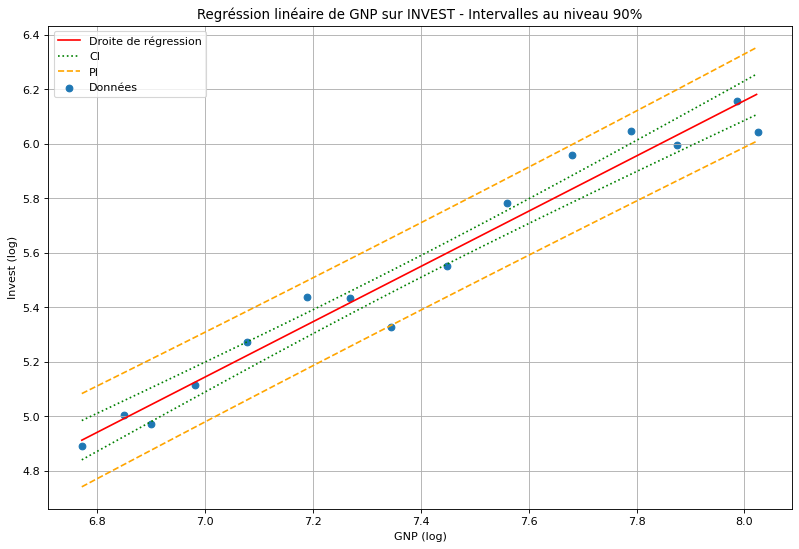

In [20]:
# Mise à l'échelle logarithmique
plt.figure(figsize=(12,8), dpi=80)
plt.grid()

X = df['gnp_log']
Y = df['invest_log']

# Tracé des données du dataframe
plt.scatter(X, Y, label='Données')
plt.xlabel('GNP (log)')
plt.ylabel('Invest (log)')

# Tracé de la droite de régression
spectre = np.arange(X.min(),X.max(),0.05)
plt.plot(spectre, θ0_calc + θ1_calc * spectre, c='r', label='Droite de régression')

# Calcul des CI et des PI
Ci_inf = []
Ci_sup = []
Pi_inf = []
Pi_sup = []
for elt in spectre:
    cipi = CI_PI(elt)
    Ci_inf.append(cipi[0])
    Ci_sup.append(cipi[1])
    Pi_inf.append(cipi[2])
    Pi_sup.append(cipi[3])
    
# Tracé des CI et des PI
plt.plot(spectre, Ci_inf, ls=':', c='g', label='CI')
plt.plot(spectre, Ci_sup, ls=':', c='g')
plt.plot(spectre, Pi_inf, ls='--', c='orange', label='PI')
plt.plot(spectre, Pi_sup, ls='--', c='orange')


# Legende, nom des axes et titre
plt.title('Regréssion linéaire de GNP sur INVEST - Intervalles au niveau 90%')
plt.legend()
plt.show()

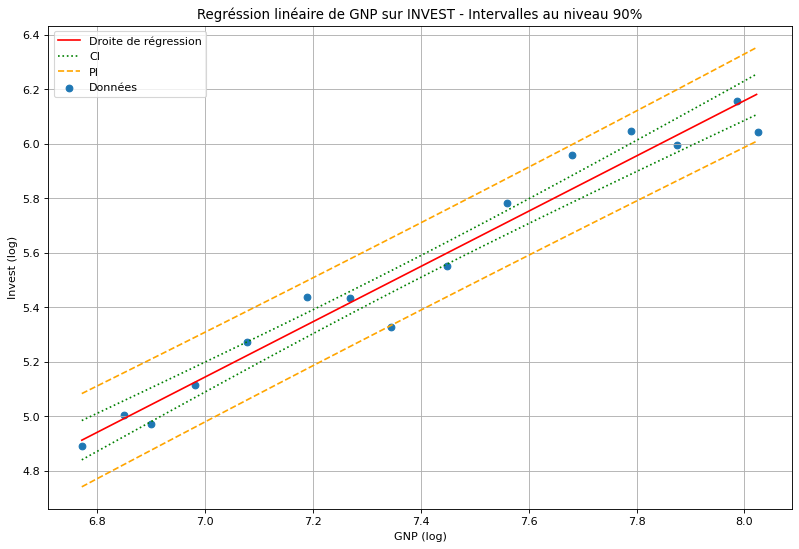

In [21]:
# Mise à l'échelle logarithmique
plt.figure(figsize=(12,8), dpi=80)
plt.grid()

X = df['gnp_log']
Y = df['invest_log']

# Tracé des données du dataframe
plt.scatter(X, Y, label='Données')
plt.xlabel('GNP (log)')
plt.ylabel('Invest (log)')

# Tracé de la droite de régression
spectre = np.arange(X.min(),X.max(),0.05)
plt.plot(spectre, θ0_calc + θ1_calc * spectre, c='r', label='Droite de régression')

# Calcul des CI et des PI
Ci_inf , Ci_sup, Pi_inf, Pi_sup = CI_PI(spectre)

    
# Tracé des CI et des PI
plt.plot(spectre, Ci_inf, ls=':', c='g', label='CI')
plt.plot(spectre, Ci_sup, ls=':', c='g')
plt.plot(spectre, Pi_inf, ls='--', c='orange', label='PI')
plt.plot(spectre, Pi_sup, ls='--', c='orange')


# Legende, nom des axes et titre
plt.title('Regréssion linéaire de GNP sur INVEST - Intervalles au niveau 90%')
plt.legend()
plt.show()

- Comparaison avec le tracé de Seaborn

<AxesSubplot:xlabel='gnp_log', ylabel='invest_log'>

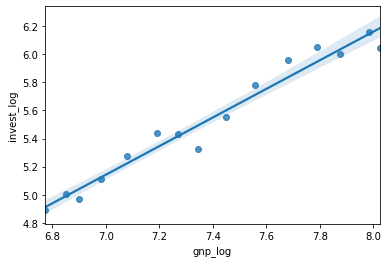

In [22]:
sns.regplot(x='gnp_log', y='invest_log', data=df, ci=90)

## <span style='color:red'>  7 - Régression en utilisant les bibliothèques prédéfinies, et comparaison des résultats </span>

In [23]:
# import du module LinearRegression
from sklearn.linear_model import LinearRegression

# Redéfinition des variables
X = df[['gnp_log']]
Y = df['invest_log']

linreg = LinearRegression()
linreg.fit(X,Y)

θ1 = linreg.coef_
θ0 = linreg.intercept_
print("Selon le modèle linéaire de SKLEARN\n - La pente = {}\n - La constante = {}".format(float(θ1), θ0))
print("\nRappel: Selon le modèle calculatoire\n - La pente = {}\n - La constante = {}".format(θ1_calc, θ0_calc))

Selon le modèle linéaire de SKLEARN
 - La pente = 1.0152814015988711
 - La constante = -1.9635913352301833

Rappel: Selon le modèle calculatoire
 - La pente = 1.0152814015988707
 - La constante = -1.9635913352301815


In [24]:
# Estimation de l’investissement prédit par le modèle pour GNP = 1000

Y_pred_1000 = np.round(np.exp(linreg.predict([[np.log(1000)]])),3)

print('Pour un GNP : 1000, le modèle entrainé prédit un investissement de {}'.format(Y_pred_1000))
print('Pour rappel, le modèle calculatoire avait prédit : {}'.format(np.exp(Y_calc_1000)))

Pour un GNP : 1000, le modèle entrainé prédit un investissement de [155.979]
Pour rappel, le modèle calculatoire avait prédit : 155.9794279310548


## <span style='color:red'>  8 - Tracer les données </span>

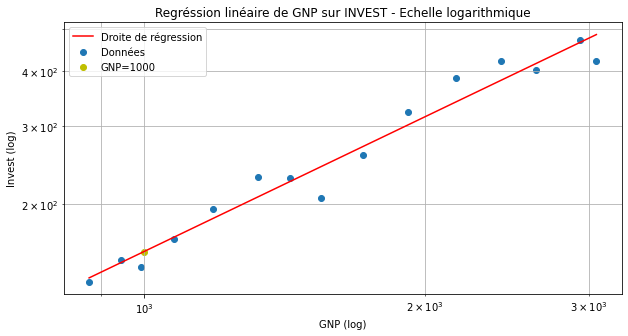

In [25]:
# Mise à l'échelle logarithmique
plt.figure(figsize=(10,5))


# Tracé des données du dataframe
plt.scatter(df['gnp'], df['invest'], label='Données')
plt.xlabel('GNP (log)')
plt.ylabel('Invest (log)')

# Tracé de la droite de régression
a = np.arange(df.gnp.min(),df.gnp.max()).reshape(-1,1)
plt.plot(a, np.exp(linreg.predict(np.log(a))),c='red', label='Droite de régression')

# Tracé du point GNP : 1000
b = np.array(1000).reshape(-1,1)
plt.scatter(b, np.exp(linreg.predict(np.log(b))), color='y', label='GNP=1000')

# Legende, nom des axes et titre
plt.title('Regréssion linéaire de GNP sur INVEST - Echelle logarithmique')
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both")
plt.legend()


## <span style='color:red'>  9 - Régression de Investment sur (GNP, Interest) : Calcul de la matrice de Gram </span>

In [26]:
# Redéfinition des variables
X = df[['gnp_log', 'interest']]
Y = df['invest_log']
Z = pd.concat([pd.DataFrame(np.ones(X.shape[0])),X], axis=1) 

In [27]:
G = Z.T @ Z
G

,0,gnp_log,interest
0,15.000000,110.752821,111.790000
gnp_log,110.752821,820.248477,839.188543
interest,111.790000,839.188543,943.855700


In [28]:
print('Les dimensions de la matrice de Gram : ',G.shape)
print('Le rang de la matrice de Gram : ',np.linalg.matrix_rank(G))
if G.shape[1] == np.linalg.matrix_rank(G):
    print('La matrice G est donc de plein rang')

Les dimensions de la matrice de Gram :  (3, 3)
Le rang de la matrice de Gram :  3
La matrice G est donc de plein rang


## <span style='color:red'>  10 - Régression de Investment sur (GNP, Interest) : Estimation des coefficients, écart-types, R2, test de significativité </span>

-    Calcul de θ as solution de l'équation normale :     $$(Z^TZ)\hat{\theta} = Z^TY$$

In [29]:
θ2 = np.linalg.solve(G, Z.T @ Y)
θ2

array([-2.18045473,  1.05124269, -0.00652888])

-    G étant de plein rang, θ s'obtient donc ainsi :     $$\hat{\theta} = (Z^TZ)^{-1}Z^TY$$

In [30]:
θ2 = np.linalg.inv(G) @ Z.T @ Y
θ2

0   -2.180455
1    1.051243
2   -0.006529
dtype: float64

-    Calcul de ${Y}_{pred}$

In [31]:
Y_pred = np.dot(Z, θ2)
Y_pred

array([4.90528557, 4.98236582, 5.03472347, 5.12797763, 5.23113153,
       5.33616949, 5.40923708, 5.5006366 , 5.61425505, 5.73044573,
       5.84403409, 5.9422537 , 6.02220069, 6.12650243, 6.18419057])

-    Calcul de $\hat{\sigma}^{2}$ :

In [32]:
n = len(X)
var_chap = 1/(Z.shape[0]-Z.shape[1])* ((Y-Y_pred)**2).sum()
var_chap
σ_chap = np.sqrt(var_chap)
print("- La variance empirique : {}\n- L'écart-type empirique :{}".format(var_chap, σ_chap))

- La variance empirique : 0.00819243295551977
- L'écart-type empirique :0.09051205972421449


-  Calcul des écarts-types & variances des coefficients
$$
\begin{array}{l}
V\left(\hat{\beta}_{0}\right)=\hat{\sigma}^{2} \cdot (\hat{G})_{00}^{-1} \\
V\left(\hat{\beta}_{1}\right)=\hat{\sigma}^{2}  \cdot(\hat{G})_{11}^{-1} \\
V\left(\hat{\beta}_{2}\right)=\hat{\sigma}^{2}  \cdot(\hat{G})_{22}^{-1}
\end{array}
$$

In [33]:
# Inversion de la matrice de Gram
G_inv = np.linalg.inv(G)
#G_inv, G_inv[0][0], G_inv[1][1], G_inv[2][2]

# Calcul des variances des coefficients

var_θ0 = var_chap * G_inv[0][0]
var_θ1 = var_chap * G_inv[1][1]
var_θ2 = var_chap * G_inv[2][2]

σ_θ0 = np.sqrt(var_θ0)
σ_θ1 = np.sqrt(var_θ1)
σ_θ2 = np.sqrt(var_θ2)

print("Coefficient θ0 [{}]:\n - Variance : {}\n - Ecart-type : {}\n".format(θ2[0],var_θ0, σ_θ0))
print("Coefficient θ1 [{}]:\n - Variance : {}\n - Ecart-type : {}\n".format(θ2[1],var_θ1, σ_θ1))
print("Coefficient θ2 [{}]:\n - Variance : {}\n - Ecart-type : {}\n".format(θ2[2],var_θ2, σ_θ2))

Coefficient θ0 [-2.180454725911435]:
 - Variance : 0.4387726972410863
 - Ecart-type : 0.6623991977962279

Coefficient θ1 [1.0512426913198045]:
 - Variance : 0.010416524891894317
 - Ecart-type : 0.10206137806190115

Coefficient θ2 [-0.006528879406070007]:
 - Variance : 0.0002354446290952433
 - Ecart-type : 0.015344205065601909



- Calcul du coefficient de détermination R2
$$R^2 = \frac{\sum_{i=1}^n{(\hat{Y}_i - \bar{Y})^2}}{\sum_{i=1}^n{(Y_i - \bar{Y})^2}}$$

In [34]:
R2 = ((Y_pred - y_mean)**2).sum() / ((Y - y_mean)**2).sum()
R2

0.9633108306728815

-  Test de significativité des coefficients


In [35]:
#Calcul de la t-stat


t_stat_0 =   θ2[0] / σ_θ0
t_stat_1 =   θ2[1] / σ_θ1
t_stat_2 =   θ2[2] / σ_θ2

print("t-Stat :\n - θ0 = {}\n - θ1 = {}\n - θ2 = {}\n".format(t_stat_0,t_stat_1,t_stat_2))

t-Stat :
 - θ0 = -3.2917532707855157
 - θ1 = 10.30010285264046
 - θ2 = -0.4254947961237963



In [36]:
# Calcul de la p-Value

# Fonction qui calcul la p_valeur à partir de la t-Stat
def p_value(t_stat):
    if t_stat < 0:
        return 2 * (stats.t.cdf(t_stat, n-3))
    else :
        return 2 * (1 - (stats.t.cdf(t_stat, n-3)))

p_value_0 = p_value(t_stat_0)
p_value_1 = p_value(t_stat_1)
p_value_2 = p_value(t_stat_2)

print("p_value :\n - θ0 = {}\n - θ1 = {}\n - θ2 = {}\n".format(p_value_0,p_value_1,p_value_2))

p_value :
 - θ0 = 0.006438367050926028
 - θ1 = 2.5995168484449493e-07
 - θ2 = 0.6780071418837433



In [37]:
# Calcul de la p-Value

# Fonction qui calcul la p_valeur à partir de la t-Stat
def p_value(t_stat):
    if t_stat < 0:
        return 2 * (stats.t.cdf(t_stat, n-3))
    else :
        return 2 * (1 - (stats.t.cdf(t_stat, n-3)))

p_value_0 = 2 * (stats.t.cdf(t_stat_0, n-3))
p_value_1 = 2 * (1 - (stats.t.cdf(t_stat_1, n-3)))
p_value_2 = 2 * (stats.t.cdf(t_stat_2, n-3))

print("p_value :\n - θ0 = {}\n - θ1 = {}\n - θ2 = {}\n".format(p_value_0,p_value_1,p_value_2))

p_value :
 - θ0 = 0.006438367050926028
 - θ1 = 2.5995168484449493e-07
 - θ2 = 0.6780071418837433



 - <span style='color:red'> <u>  Commentaire :</u></span>
    
    Etant donné l'hypothèse H0 pour chacun des coefficients, on a les probabilités marquées ci-dessus d'observer nos coefficients.
    
    Cela veut dire pour θ0 et θ1, il est très peu vraisemblalble que nos valeurs soient le fruit du hasard. Ces deux coefficients sont donc significatifs et sont à retenir.
    Par contre, pour θ2, on a 67% de chances de retomber sur cette valeur. L'hypothèse H0 est à retenir dans ce cas là, et le coefficient θ2 n'est pas significatif

## <span style='color:red'>  11 - Prédiction du Invest pour (GNP : 1000, Interest : 10) + Intervalles de confiance à 99.9% </span>

In [38]:
Z = (1, np.log(1000), 10)
Y_pred = np.dot(Z, θ2)
np.exp(Y_pred)

150.80441472101452

In [39]:
# Confidence intervals for the predicted values at 99.9%

t = stats.t.ppf([0.0005,0.9995],n-3)

z = pd.Series([1,np.log(1000),10]).T

Z = pd.concat([pd.DataFrame(np.ones(X.shape[0])),X], axis=1) 

a = z.T @ np.linalg.inv(Z.T@Z) @ z


CI_1 = Y_pred + t[0] * σ_chap * np.sqrt(a)
CI_2 = Y_pred + t[1] * σ_chap * np.sqrt(a)

PI_1 = Y_pred + t[0] * σ_chap * np.sqrt(1 + a)
PI_2 = Y_pred + t[1] * σ_chap * np.sqrt(1 + a)

In [40]:
print("L'intervalle de confiance de la valeur prédite:")
print("CI = [ {} , {} ] \n".format(np.exp(CI_1),np.exp(CI_2)))
print("L'intervalle de confiance de la variable à expliquer:")
print("PI = [ {} , {} ]".format(np.exp(PI_1),np.exp(PI_2)))

L'intervalle de confiance de la valeur prédite:
CI = [ 103.56340529579143 , 219.59466700031388 ] 

L'intervalle de confiance de la variable à expliquer:
PI = [ 87.68960327818468 , 259.34626967351835 ]


In [41]:
print("En échelle logarithmique\n")
print("L'intervalle de confiance de la valeur prédite:")
print("CI = [ {} , {} ] \n".format(CI_1,CI_2))
print("L'intervalle de confiance de la variable à expliquer:")
print("PI = [ {} , {} ]".format(PI_1,PI_2))

En échelle logarithmique

L'intervalle de confiance de la valeur prédite:
CI = [ 4.640184036689107 , 5.391783424278166 ] 

L'intervalle de confiance de la variable à expliquer:
PI = [ 4.473803343641273 , 5.558164117326003 ]


## <span style='color:red'>  12 - Tracé en 3d des résultats </span>

In [42]:
# Fonction qui renvoie les CI et PI pour chaque tuple (x ='GNP', z = 'Interest') à alpha = 10%
def CI_PI(x,z):
    
    # x doit déjà être en échelle logarithmique
    n = len(X)
    t = stats.t.ppf([0.05,0.95],n-2)

    zz = pd.Series([1,x,z]).T
    ZZ = pd.concat([pd.DataFrame(np.ones(n)),X,Z], axis=1) 
    
    y = θ2[0] + θ2[1] * x + θ2[2] * z
    
    a = zz.T @ np.linalg.inv(ZZ.T@ZZ) @ zz
    
    # Intervalle de confiance pour la variable prédite
    CI_inf = y + t[0] * σ_chap * np.sqrt(a)
    CI_sup = y + t[1] * σ_chap * np.sqrt(a)

    # Intervalle de confiance pour la variable à expliquer
    PI_inf = y + t[0] * σ_chap * np.sqrt(1 + a)
    PI_sup = y + t[1] * σ_chap * np.sqrt(1 + a)
    
    
    return [CI_inf, CI_sup, PI_inf, PI_sup]

In [43]:
X = df['gnp_log']
Z = df['interest']
Y = df['invest_log']

In [44]:
X_range = np.arange(X.min(),X.max(),(X.max()-X.min())/100).reshape(-1,1)
Z_range = np.arange(Z.min(),Z.max(),(Z.max()-Z.min())/100).reshape(-1,1)
x, z = np.meshgrid(X_range, Z_range)
y = θ2[0] + θ2[1] * x + θ2[2] * z

In [45]:
Ci_sup = np.zeros(x.shape)
Ci_inf = np.zeros(x.shape)
Pi_sup = np.zeros(x.shape)
Pi_inf = np.zeros(x.shape)

In [54]:
for i in range(len(x)):
    for j in range(len(z)):
        cipi = CI_PI(x[i][j], z[i][j])
        Ci_inf[i][j] = (cipi[0])
        Ci_sup[i][j] = (cipi[1])
        Pi_inf[i][j] = (cipi[2])
        Pi_sup[i][j] = (cipi[3])

LinAlgError: Singular matrix

In [53]:
Ci_inf.shape

(100, 100)

<IPython.core.display.Javascript object>


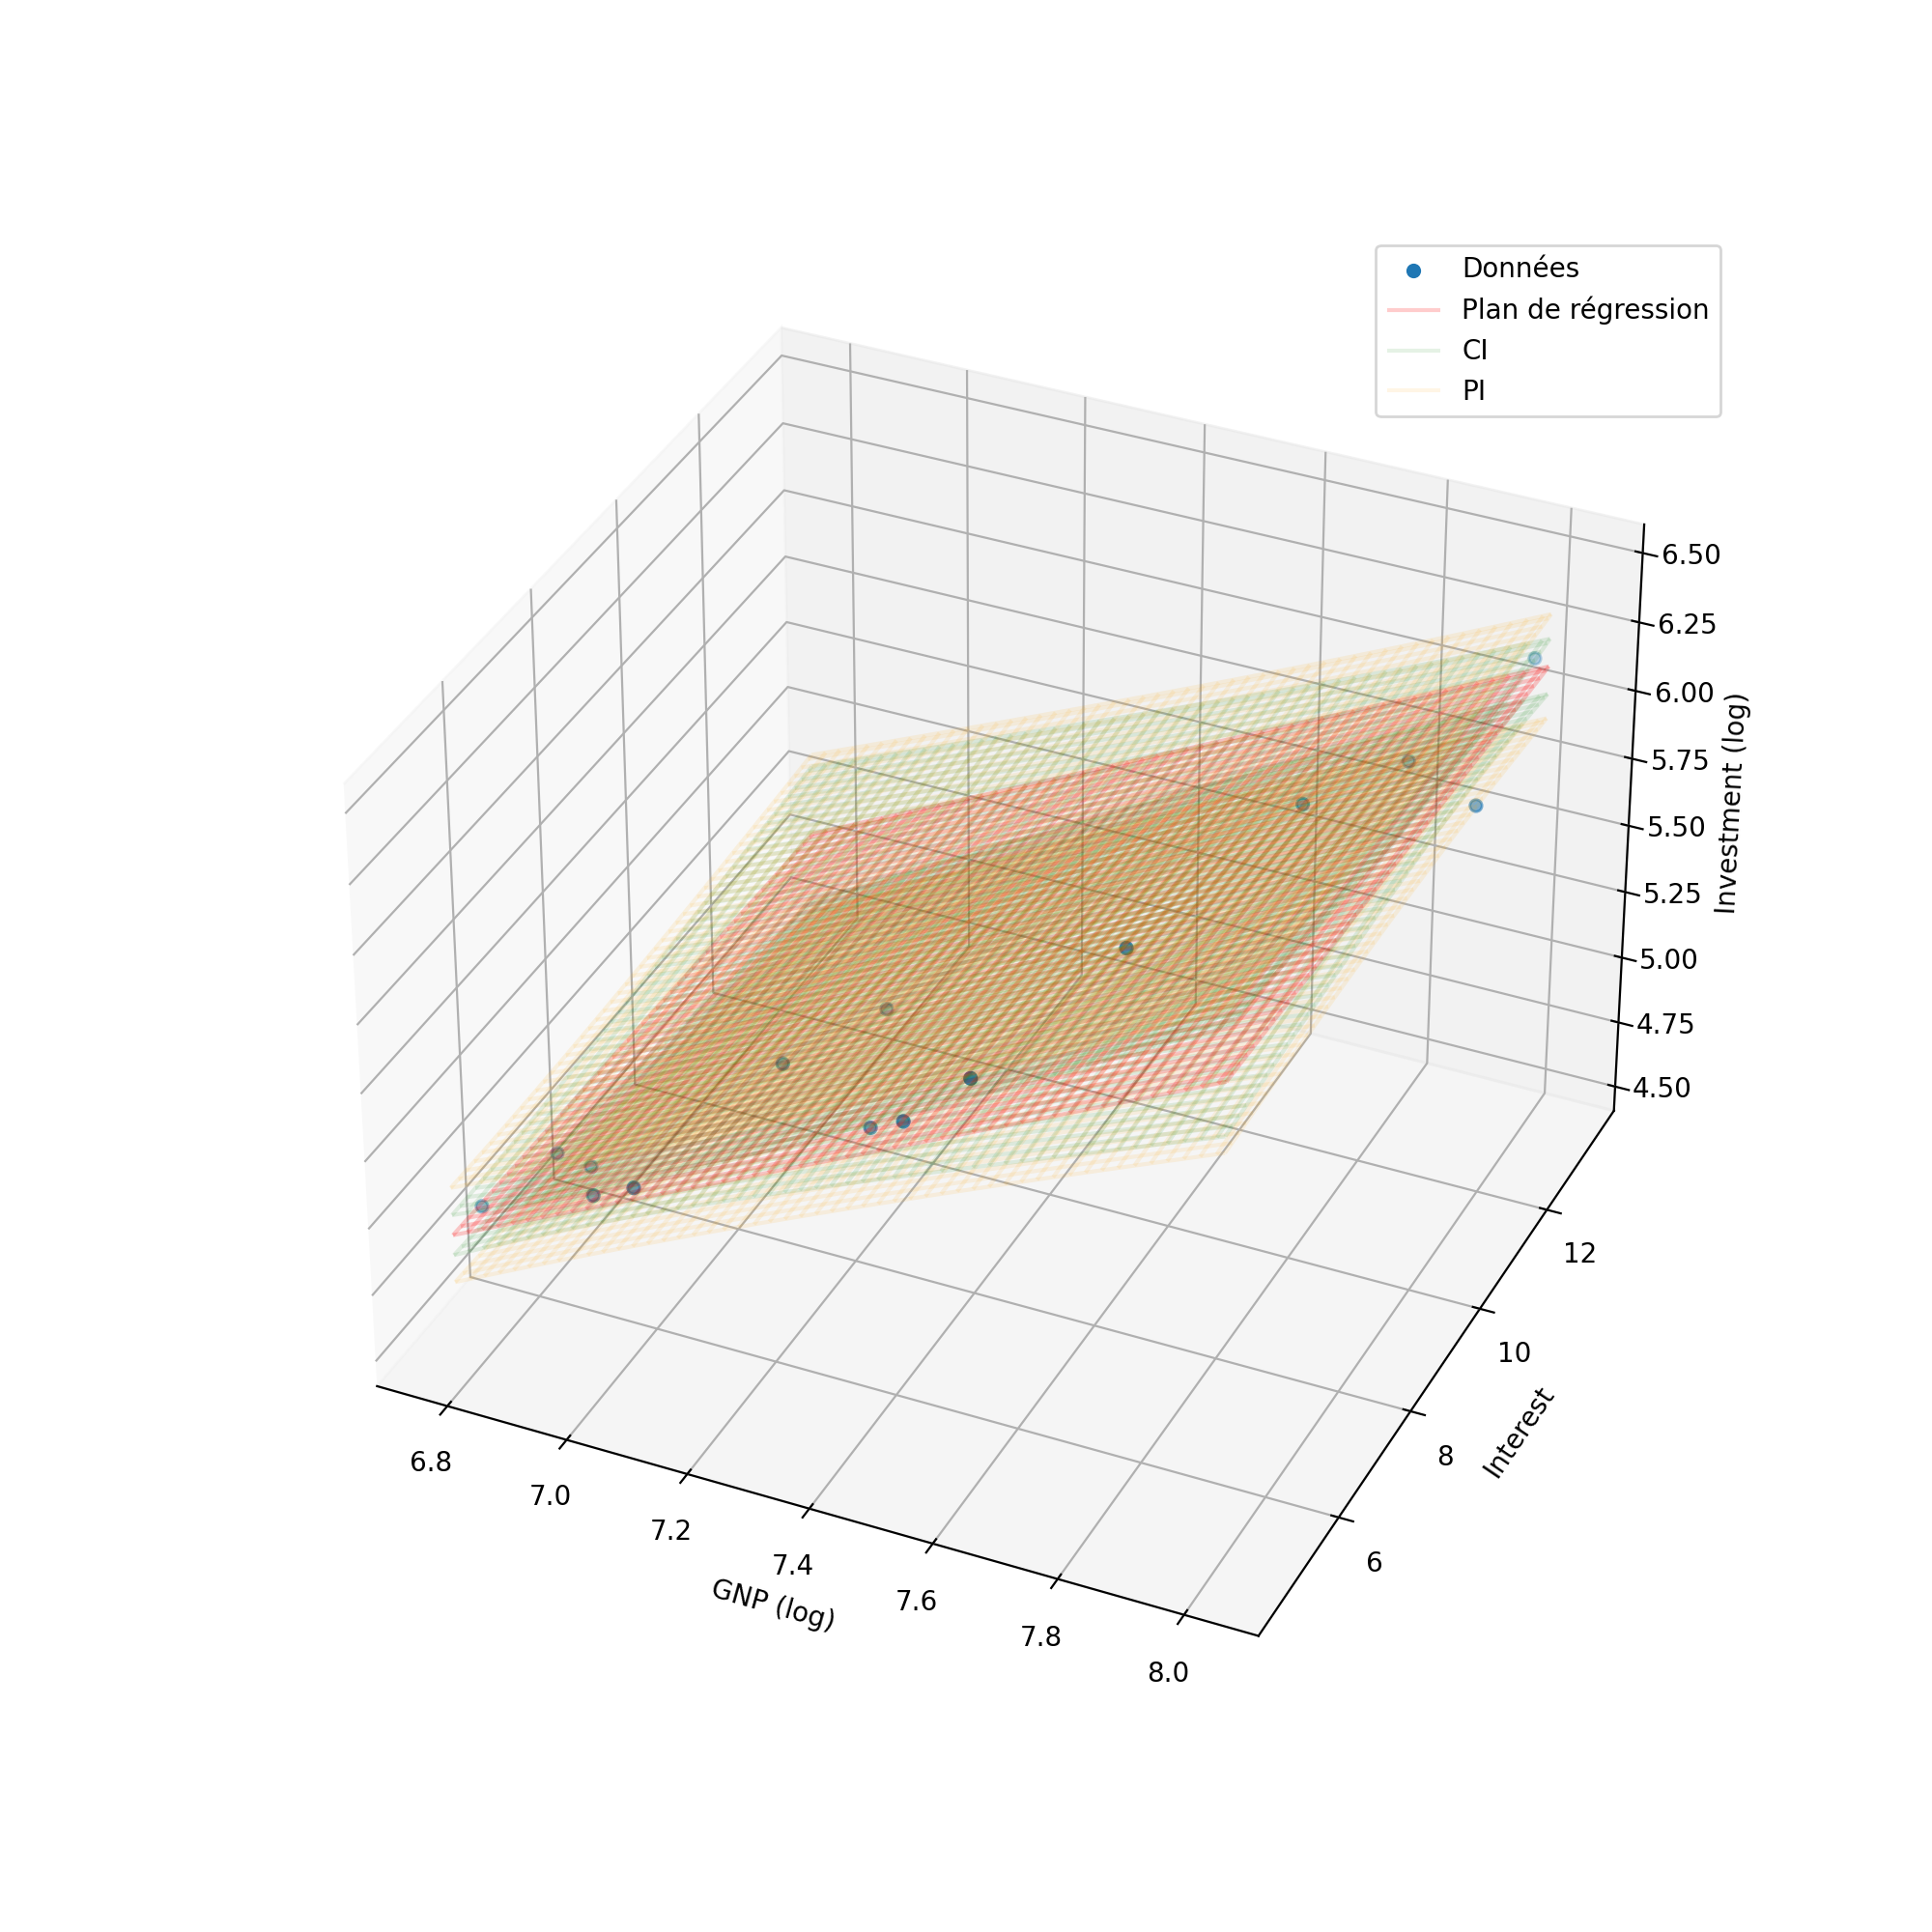

In [47]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter(X,Z,Y, label='Données')

ax.set_xlabel('GNP (log)')
ax.set_ylabel('Interest')
ax.set_zlabel('Investment (log)')

ax.plot_wireframe(x, z, y, color='r',alpha=0.2, label='Plan de régression')
ax.plot_wireframe(x, z, Ci_inf, color='g',alpha=0.1, label='CI')
ax.plot_wireframe(x, z, Ci_sup, color='g',alpha=0.1)
ax.plot_wireframe(x, z, Pi_inf, color='orange',alpha=0.1, label='PI')
ax.plot_wireframe(x, z, Pi_sup, color='orange',alpha=0.1)


plt.legend()

## <span style='color:red'> 13 - Calcul des coefficients de régression en utilisant la bibliothèque SKlearn </span>

In [48]:
# import du module LinearRegression
from sklearn.linear_model import LinearRegression

# Redéfinition des variables
X = df[['gnp_log', 'interest']]
Y = df['invest_log']

linreg = LinearRegression()
linreg.fit(X,Y)

Y_pred = linreg.predict(X)
linreg.intercept_, linreg.coef_

(-2.180454725911403, array([ 1.05124269, -0.00652888]))

In [49]:
R2 = linreg.score(X, Y)
R2

0.9633108306726242